In [196]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv('speeddating.csv')

df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'


In [195]:
def prepare_data(dataset):
    new_df = dataset.copy(deep=True)
    #binarize gender variable
    new_df['gender'].replace({new_df['gender'].unique()[0]:0,
                     new_df['gender'].unique()[1]:1})
    #transform target variable
    new_df['match'] =new_df['match'].apply(lambda x :x [2:-1]).astype(int)
    #dropping Nan Columns
    s =(new_df.isna().sum()/new_df.shape[0] > 0.08)
    columns_to_drop =s[s].index.values
    return new_df.select_dtypes(exclude=['object']).drop(columns = columns_to_drop).dropna()
    

In [199]:
df_clean = prepare_data(df)
df_clean.columns

Index(['wave', 'age', 'age_o', 'd_age', 'importance_same_race',
       'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere',
       'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
       'pref_o_shared_interests', 'attractive_o', 'sinsere_o',
       'intelligence_o', 'funny_o', 'attractive_important',
       'sincere_important', 'intellicence_important', 'funny_important',
       'ambtition_important', 'shared_interests_important', 'attractive',
       'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner',
       'sincere_partner', 'intelligence_partner', 'funny_partner', 'sports',
       'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming',
       'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music',
       'shopping', 'yoga', 'interests_correlate',
       'expected_happy_with_sd_people', 'like', 'guess_prob_liked', 'met',
       'match'],
      dtype='object')

In [206]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import pandas as pd

#param_grid = {'kernel': ('linear', 'rbf'),
             # 'C': [1, 10, 100]}
#base_estimator = SVC(gamma='scale')
param_grid = {'max_depth': [3, 5, 10],
               'min_samples_split': [2, 5, 10]}
base_estimator = RandomForestClassifier(random_state=0)
X, y = df_clean[df_clean.columns[:-1]], df_clean['match']
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                          factor=2, max_resources=40,
                          aggressive_elimination=False).fit(X, y)

In [207]:
sh.n_resources_


[20, 40]

In [208]:
sh.n_candidates_

[9, 5]

In [209]:
sh.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=0)

In [210]:
sh.best_score_

0.8464285714285713

In [211]:
df['match'].value_counts()

b'0'    6998
b'1'    1380
Name: match, dtype: int64

In [213]:
6998/(6998+1380)

0.8352828837431368

In [216]:
clf = RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=0)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(df_clean[df_clean.columns[:-1]], df_clean['match'])

clf.fit(X_train,y_train)



RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=0)

In [218]:
print(classification_report(y_test,clf.predict(X_test),target_names=['no match','match']))

              precision    recall  f1-score   support

    no match       0.85      0.99      0.91      1451
       match       0.83      0.18      0.30       319

    accuracy                           0.85      1770
   macro avg       0.84      0.59      0.61      1770
weighted avg       0.84      0.85      0.80      1770



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
 import pandas as pd

param_grid = {'max_depth': [3, 5, 10],
               'min_samples_split': [2, 5, 10]}
base_estimator = RandomForestClassifier(random_state=0)

sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                          factor=2, resource='n_estimators',
                         max_resources=30).fit(X, y)

In [194]:
df['race'].unique()

array(["b'Asian/Pacific Islander/Asian-American'",
       "b'European/Caucasian-American'", "b'Other'",
       "b'Latino/Hispanic American'", "b'Black/African American'", "b'?'"],
      dtype=object)

In [ ]:
df['gender'].replace({df['gender'].unique()[0]:0,
                     df['gender'].unique()[1]:1})

In [140]:
df['gender'].unique()

array(["b'female'", "b'male'"], dtype=object)

In [ ]:
df['gender'].unique()

In [221]:
df['match'] =df['match'].apply(lambda x :x [2:-1]).astype(int)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 123 entries, has_null to match
dtypes: float64(59), object(64)
memory usage: 7.9+ MB


In [5]:
df.describe()

,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met
count,8378.000000,8283.000000,8274.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,...,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,1800.000000,7205.000000,8138.000000,8069.000000,8003.000000
mean,11.350919,26.358928,26.364999,4.185605,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,...,7.851066,5.631281,4.339197,0.196010,5.534131,5.570556,3.207814,6.134087,5.207523,0.049856
std,5.995903,3.566763,3.563648,4.596171,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,...,1.791827,2.608913,2.717612,0.303539,1.734059,4.762569,2.444813,1.841285,2.129565,0.282168
min,1.000000,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,24.000000,1.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,...,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000
50%,11.000000,26.000000,26.000000,3.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,...,8.000000,6.000000,4.000000,0.210000,6.000000,4.000000,3.000000,6.000000,5.000000,0.000000
75%,15.000000,28.000000,28.000000,5.000000,6.000000,6.000000,25.000000,20.000000,23.810000,20.000000,...,9.000000,8.000000,7.000000,0.430000,7.000000,8.000000,4.000000,7.000000,7.000000,0.000000
max,21.000000,55.000000,55.000000,37.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,...,10.000000,10.000000,10.000000,0.910000,10.000000,20.000000,18.000000,10.000000,10.000000,8.000000


In [14]:
df.isna().sum()

has_null                0
wave                    0
gender                  0
age                    95
age_o                 104
                     ... 
d_guess_prob_liked      0
met                   375
decision                0
decision_o              0
match                   0
Length: 123, dtype: int64

In [16]:
df.shape

(8378, 123)

In [15]:

kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
make_pipeline(StandardScaler(), kmeans).fit(df[['age','age_o']].dropna())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=10, n_init=4, random_state=0))])

In [24]:
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4)
reduced_data = df[['age','age_o']].dropna().values##Ou PCA ? 
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
reduced_data.values[:, 0]

array([21., 21., 21., ..., 25., 25., 25.])

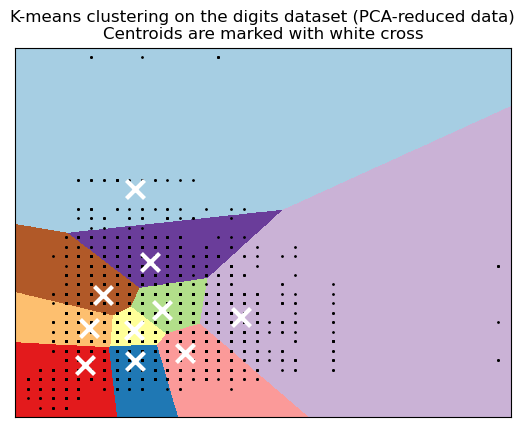

In [29]:
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4)
reduced_data = df[['age','age_o']].dropna().values ##Ou PCA ? 
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [31]:
len(df.columns)

123

In [67]:
df['importance_same_religion']

0       4.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
8373    1.0
8374    1.0
8375    1.0
8376    1.0
8377    1.0
Name: importance_same_religion, Length: 8378, dtype: float64

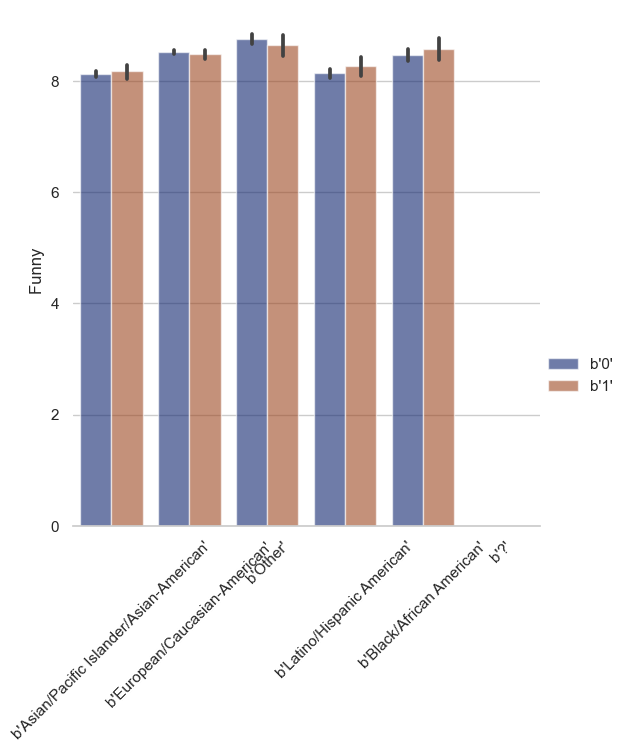

In [59]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="race", y="funny", hue="match",
   palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Funny ")
plt.xticks(rotation=45)
g.legend.set_title("")

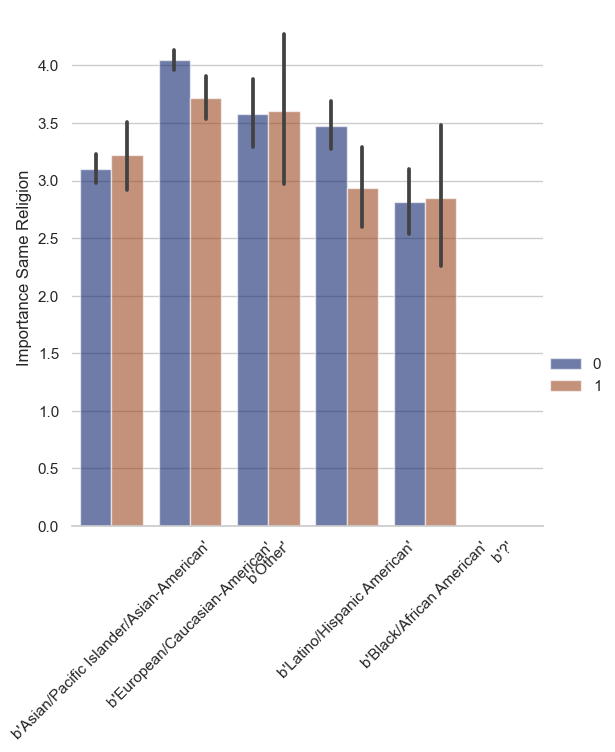

In [143]:
sns.set_theme(style="whitegrid")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="race", y="importance_same_religion", hue="match",
   palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Importance Same Religion")
plt.xticks(rotation=45)
g.legend.set_title("")

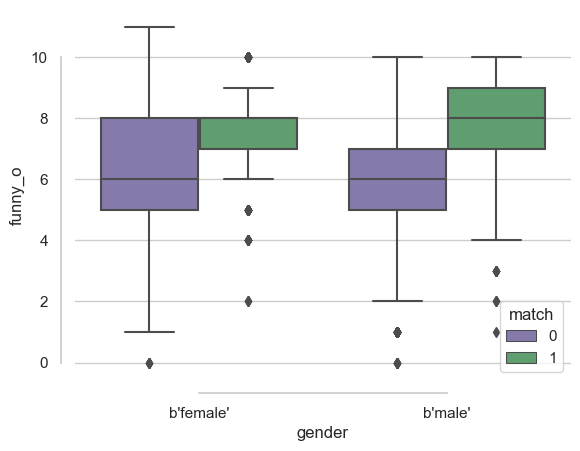

In [149]:
sns.boxplot(x="gender", y="funny_o",
            hue="match", palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

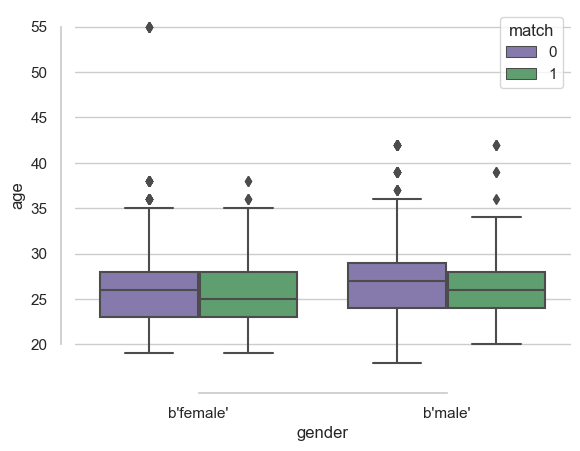

In [152]:
sns.boxplot(x="gender", y="age",
            hue="match", palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

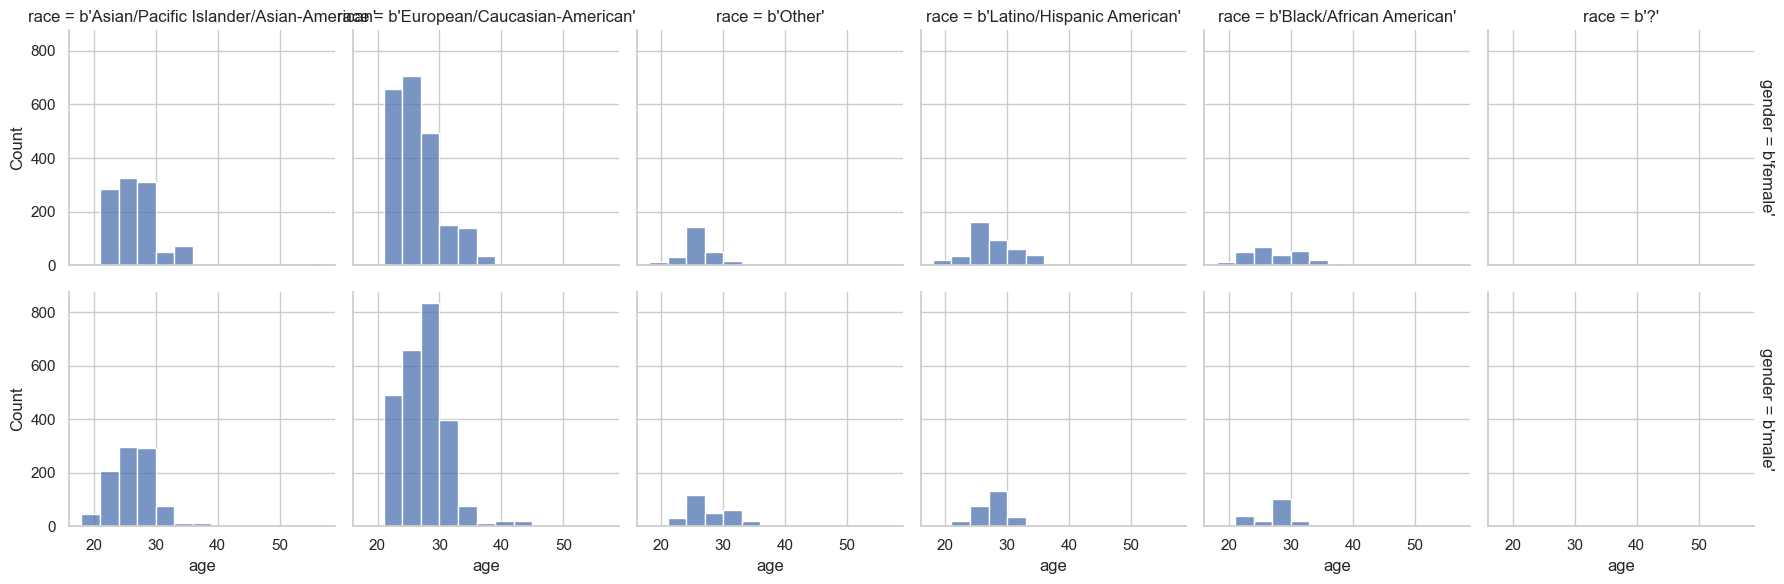

In [154]:
sns.displot(
    df, x="age", col="race", row="gender",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

<AxesSubplot:>

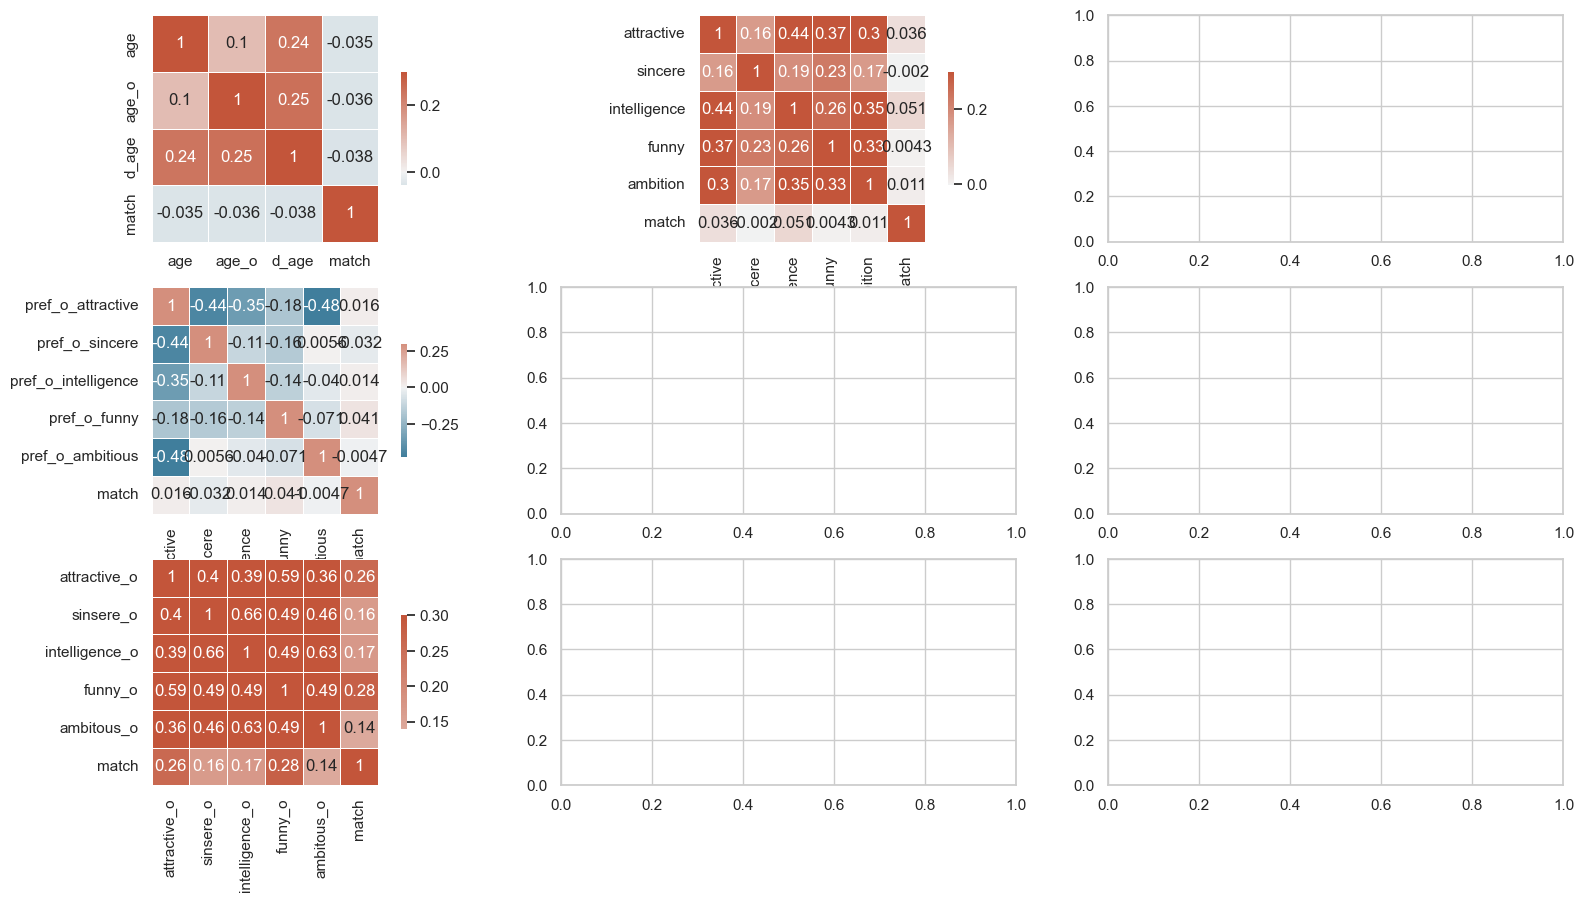

In [130]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio


fig, ax = plt.subplots(3,3, figsize=(20,10))
sns.heatmap(df[list(df.columns[2:8])+['match']].corr(),  cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5},ax=ax[0,0])
sns.heatmap(df[list(df.columns[12:20])+['match']].corr(),  cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5},ax=ax[1,0] )
sns.heatmap(df[list(df.columns[21:32])+['match']].corr(),  cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5},ax=ax[2,0] )
sns.heatmap(df[list(df.columns[45:60])+['match']].corr(),  cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5},ax=ax[0,1] )



In [131]:
df[list(df.columns[65:85])+['match']].corr()

,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,match
ambition_partner,1.000000,0.432839,0.018819,0.025261,0.048688,0.072775,0.074903,0.072755,0.017153,0.013659,0.036111,0.116985,0.116055,0.092002,0.140042
shared_interests_partner,0.432839,1.000000,0.049982,0.045382,0.055460,0.078517,0.075137,0.070851,0.030471,0.077443,0.047255,0.041092,0.048908,0.062605,0.270679
sports,0.018819,0.049982,1.000000,0.479965,0.396333,-0.064060,-0.126004,-0.126624,0.177109,0.128643,0.049860,-0.141269,-0.097176,-0.252943,0.021666
tvsports,0.025261,0.045382,0.479965,1.000000,0.227852,-0.054278,-0.080104,-0.098732,-0.012371,0.254329,0.084676,-0.157089,0.255389,-0.088705,-0.004472
exercise,0.048688,0.055460,0.396333,0.227852,1.000000,0.085143,-0.007210,-0.014675,0.069015,0.007194,0.015275,0.007122,0.026171,-0.013915,0.009470
dining,0.072775,0.078517,-0.064060,-0.054278,0.085143,1.000000,0.386673,0.341537,0.077145,0.061606,0.231037,0.104700,0.111967,0.305682,0.033912
museums,0.074903,0.075137,-0.126004,-0.080104,-0.007210,0.386673,1.000000,0.858548,0.180012,-0.078094,0.114430,0.327652,0.026396,0.549573,0.014954
art,0.072755,0.070851,-0.126624,-0.098732,-0.014675,0.341537,0.858548,1.000000,0.192367,-0.064945,0.134655,0.238423,0.018157,0.527193,0.031545
hiking,0.017153,0.030471,0.177109,-0.012371,0.069015,0.077145,0.180012,0.192367,1.000000,0.157343,0.013731,0.042377,-0.147967,0.073997,0.024143
gaming,0.013659,0.077443,0.128643,0.254329,0.007194,0.061606,-0.078094,-0.064945,0.157343,1.000000,0.190855,-0.062705,0.199103,-0.040095,0.013543


In [138]:
df.corr()['match'].sort_values( ascending=False)

match                            1.000000
like                             0.305723
funny_o                          0.277700
funny_partner                    0.277545
shared_interests_o               0.270840
shared_interests_partner         0.270679
attractive_o                     0.260837
attractive_partner               0.260676
guess_prob_liked                 0.255531
intelligence_partner             0.169532
intelligence_o                   0.169448
sinsere_o                        0.164523
sincere_partner                  0.164449
expected_num_interested_in_me    0.143755
ambition_partner                 0.140042
ambitous_o                       0.139927
expected_num_matches             0.130592
met                              0.100427
clubbing                         0.055435
intelligence                     0.051066
funny_important                  0.041652
pref_o_funny                     0.041483
yoga                             0.036601
attractive                       0

In [ ]:
df[].corr()['match'].sort_values( ascending=False)

In [139]:
df.corr()['match'].sort_values()

importance_same_race            -0.049032
pref_o_shared_interests         -0.048399
shared_interests_important      -0.048318
d_age                           -0.038239
age_o                           -0.035865
age                             -0.035055
pref_o_sincere                  -0.032391
sincere_important               -0.032325
importance_same_religion        -0.026014
movies                          -0.022989
wave                            -0.017404
tv                              -0.014542
pref_o_ambitious                -0.004650
tvsports                        -0.004472
ambtition_important             -0.004444
sincere                         -0.001965
shopping                        -0.001333
theater                          0.000087
funny                            0.004327
exercise                         0.009470
ambition                         0.010592
gaming                           0.013543
pref_o_intelligence              0.013761
intellicence_important           0

In [141]:
#female
df[df['gender']==df['gender'].unique()[0]].corr()['match'].sort_values( ascending=False)

match                            1.000000
like                             0.318880
funny_partner                    0.300767
shared_interests_partner         0.298891
attractive_partner               0.269708
guess_prob_liked                 0.257152
attractive_o                     0.256774
funny_o                          0.254095
shared_interests_o               0.242368
intelligence_partner             0.176440
sincere_partner                  0.175252
intelligence_o                   0.162530
expected_num_matches             0.157257
sinsere_o                        0.153316
ambitous_o                       0.152698
expected_num_interested_in_me    0.138222
ambition_partner                 0.130022
met                              0.095509
clubbing                         0.068358
art                              0.060159
funny_important                  0.059271
concerts                         0.054530
museums                          0.048651
yoga                             0

In [142]:
#male
df[df['gender']==df['gender'].unique()[1]].corr()['match'].sort_values( ascending=False)

match                            1.000000
funny_o                          0.300767
shared_interests_o               0.298891
like                             0.294179
attractive_o                     0.269808
attractive_partner               0.256678
guess_prob_liked                 0.253903
funny_partner                    0.253856
shared_interests_partner         0.242114
intelligence_o                   0.176440
sinsere_o                        0.175252
intelligence_partner             0.162657
sincere_partner                  0.153213
ambition_partner                 0.152805
expected_num_interested_in_me    0.149331
ambitous_o                       0.130022
met                              0.110946
expected_num_matches             0.104607
intelligence                     0.086714
pref_o_funny                     0.059271
ambition                         0.050591
attractive                       0.048772
clubbing                         0.043341
sports                           0

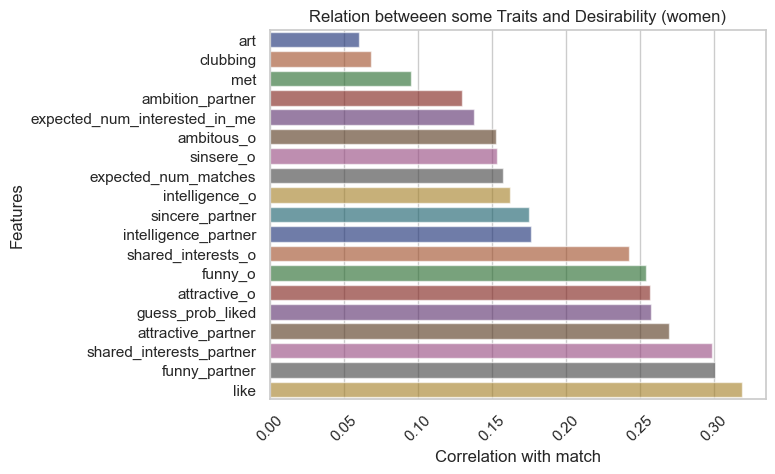

In [253]:
sns.set_theme(style="whitegrid")


g = sns.barplot(
    x=df[df['gender']==df['gender'].unique()[0]].corr()['match'].sort_values()[40:-1],
    y=df[df['gender']==df['gender'].unique()[0]].corr()['match'].sort_values()[40:-1].index,
  
   palette="dark", alpha=.6
)

g.set(xlabel='Correlation with match', ylabel='Features')
plt.xticks(rotation=45)
g.set_title("Relation betweeen some Traits and Desirability (women)");

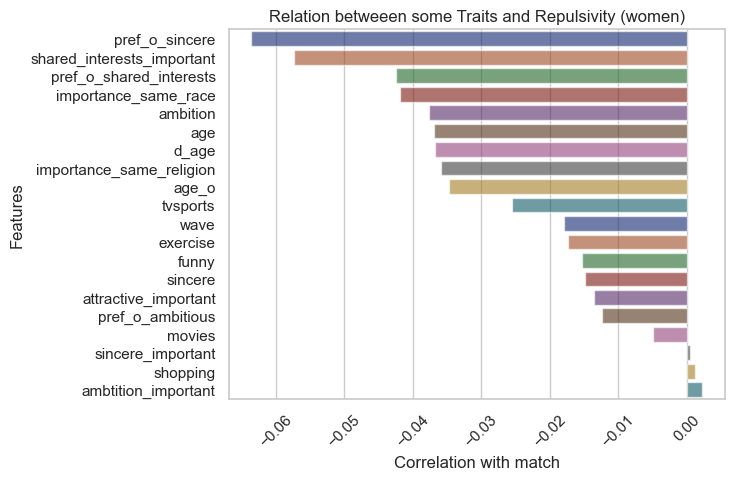

In [256]:
sns.set_theme(style="whitegrid")


g = sns.barplot(
    x=df[df['gender']==df['gender'].unique()[0]].corr()['match'].sort_values()[:20],
    y=df[df['gender']==df['gender'].unique()[0]].corr()['match'].sort_values()[:20].index,
  
   palette="dark", alpha=.6
)

g.set(xlabel='Correlation with match', ylabel='Features')
plt.xticks(rotation=45)
g.set_title("Relation betweeen some Traits and Repulsivity (women)");

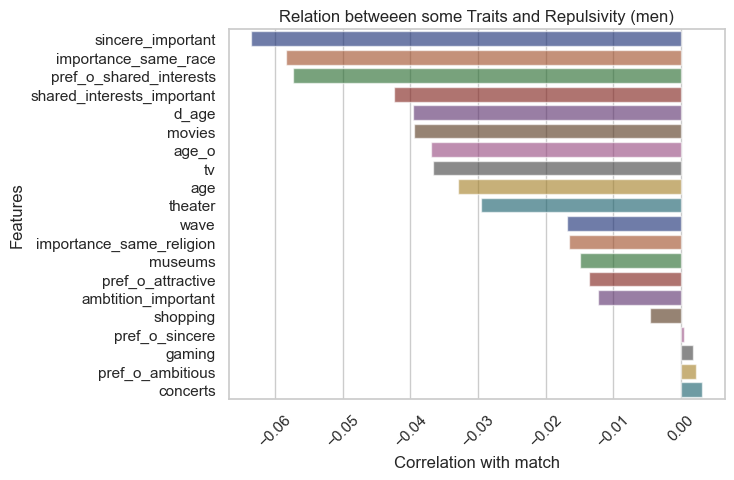

In [257]:
sns.set_theme(style="whitegrid")


g = sns.barplot(
    x=df[df['gender']==df['gender'].unique()[1]].corr()['match'].sort_values()[:20],
    y=df[df['gender']==df['gender'].unique()[1]].corr()['match'].sort_values()[:20].index,
  
   palette="dark", alpha=.6
)

g.set(xlabel='Correlation with match', ylabel='Features')
plt.xticks(rotation=45)
g.set_title("Relation betweeen some Traits and Repulsivity (men)");

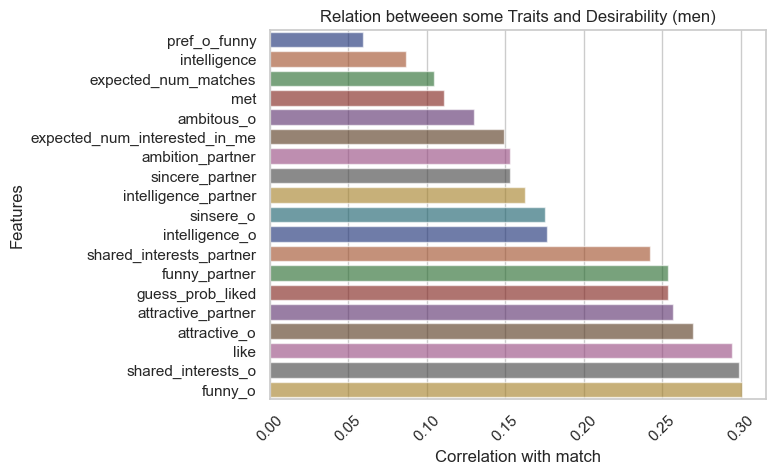

In [254]:
sns.set_theme(style="whitegrid")


g = sns.barplot(
    x=df[df['gender']==df['gender'].unique()[1]].corr()['match'].sort_values()[40:-1],
    y=df[df['gender']==df['gender'].unique()[1]].corr()['match'].sort_values()[40:-1].index,
  
   palette="dark", alpha=.6
)

g.set(xlabel='Correlation with match', ylabel='Features')
plt.xticks(rotation=45)
g.set_title("Relation betweeen some Traits and Desirability (men)");

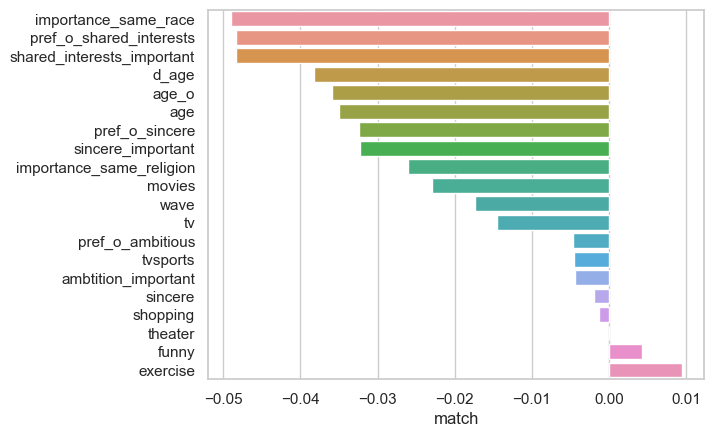

In [232]:
sns.barplot(x=df.corr()['match'].sort_values()[:20], y=df.corr()['match'].sort_values()[:20].index,orient='h');

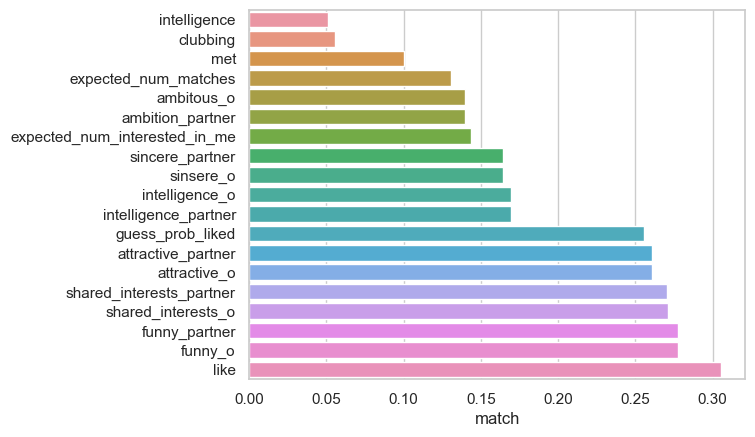

In [233]:
sns.barplot(x=df.corr()['match'].sort_values()[40:-1], y=df.corr()['match'].sort_values()[40:-1].index,orient='h');

In [190]:
s =(df.isna().sum()/df.shape[0] > 0.08)
columns_to_drop =s[s].index.values
columns_to_drop

array(['ambitous_o', 'shared_interests_o', 'ambition_partner',
       'shared_interests_partner', 'expected_num_interested_in_me',
       'expected_num_matches'], dtype=object)

In [163]:
df.shape

(8378, 123)

In [162]:
df.dropna().shape

(1048, 123)

In [167]:
df.shape

(8378, 123)

In [193]:
df_clean = df.select_dtypes(exclude=['object']).drop(columns = columns_to_drop).dropna()

,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met,match
0,1.0,21.0,27.0,6.0,2.0,4.0,35.0,20.0,20.0,20.0,...,10.0,9.0,8.0,1.0,0.14,3.0,7.0,6.0,0.0,0
1,1.0,21.0,22.0,1.0,2.0,4.0,60.0,0.0,0.0,40.0,...,10.0,9.0,8.0,1.0,0.54,3.0,7.0,5.0,1.0,0
3,1.0,21.0,23.0,2.0,2.0,4.0,30.0,5.0,15.0,40.0,...,10.0,9.0,8.0,1.0,0.61,3.0,7.0,6.0,0.0,1
4,1.0,21.0,24.0,3.0,2.0,4.0,30.0,10.0,20.0,10.0,...,10.0,9.0,8.0,1.0,0.21,3.0,6.0,6.0,0.0,1
5,1.0,21.0,25.0,4.0,2.0,4.0,50.0,0.0,30.0,10.0,...,10.0,9.0,8.0,1.0,0.25,3.0,6.0,5.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,21.0,25.0,24.0,1.0,1.0,1.0,10.0,15.0,30.0,20.0,...,10.0,10.0,7.0,3.0,0.28,10.0,4.0,4.0,0.0,0
8373,21.0,25.0,26.0,1.0,1.0,1.0,10.0,10.0,30.0,20.0,...,10.0,10.0,7.0,3.0,0.64,10.0,2.0,5.0,0.0,0
8374,21.0,25.0,24.0,1.0,1.0,1.0,50.0,20.0,10.0,5.0,...,10.0,10.0,7.0,3.0,0.71,10.0,4.0,4.0,0.0,0
8376,21.0,25.0,22.0,3.0,1.0,1.0,10.0,25.0,25.0,10.0,...,10.0,10.0,7.0,3.0,0.62,10.0,5.0,5.0,0.0,0
